In [4]:
from astropy.io import fits
import numpy as np
import aplpy
import matplotlib.pyplot as plt
from custom_cmap import custom_cmap
%matplotlib inline


This notebook makes use of the *Herschel* based extinction map from Lombardi et al 2014

In [2]:
filen = 'extinction.fits'
data = fits.getdata(filen)

In [5]:
colormaps = [plt.cm.Blues,
          plt.cm.gray_r,
          plt.cm.RdGy]

scalemax = np.nanmax(data)
scalemin = np.nanmin(data)

lower =[scalemin,.1,.8]
upper = [0.1,0.8,scalemax]

cmap = custom_cmap(colormaps, lower,upper,1)

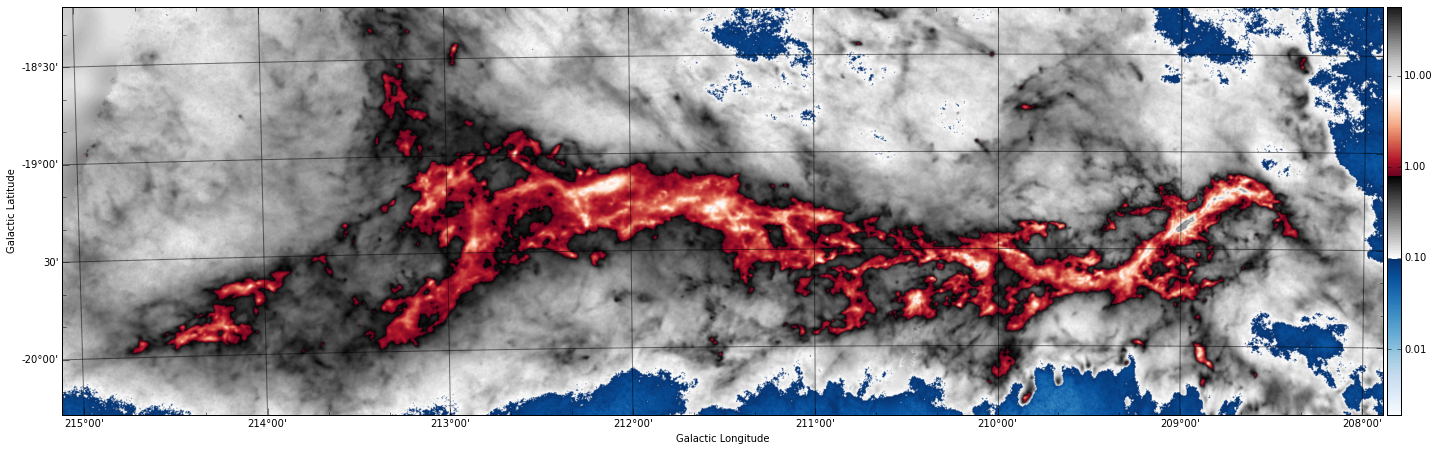

In [7]:
fig = plt.figure(figsize=(24,8))
gc = aplpy.FITSFigure(filen,figure=fig)
gc.set_theme('publication')
gc.show_colorscale(cmap=cmap,stretch='log',vmin=scalemin,vmax=scalemax,interpolation='bicubic')
lcen, width = 211.5, 6.8
bcen, height = -19.3, 2.1
gc.recenter(lcen, bcen, width = width, height=height)
gc.show_colorbar()
gc.colorbar.set_ticks([0.01,0.1,1,10])
gc.ticks.set_minor_frequency(3)
gc.tick_labels.set_xformat('dd:mm')
gc.tick_labels.set_yformat('dd:mm')
gc.show_grid()
gc.grid.set_color('black')